# Project: Football Fever dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'> </a>
### Introduction
I was provided a dataset of football (not soccer) matches, teams, leagues, countries and players. 
<br> Looking at the data I decided to focus on the core leagues i.e. England, France, Italy, Germany, Spain 
<br> <b> The first question I'll be answering is: </b>
<br> What is the win percentage to win the league (compared between 2008 and 2016)?
<br> <b> The second question is </b>whether there is a correlation between winning and defence i.e. defence pressure, defence aggression and defence team width class? 
<br> <b> The last question I'll be asking is: </b>
<br> Which countries' league has the highest team and player attributes for 2016?


### SQL steps to download the dataset
##### Dataset for matches with goals scored, teams in the core leagues from 2008 to 2018 
SELECT m.id, m.season, m.home_team_goal, m.away_team_goal, 
<br> &emsp;			m.date, m.home_player_1, m.home_player_2, m.home_player_3,
<br> &emsp;			m.home_player_4, m.home_player_5, m.home_player_6,
<br>&emsp;				m.home_player_7, m.home_player_8, m.home_player_9,
<br>&emsp;				m.home_player_10, m.home_player_11, m.away_player_1,
<br>&emsp;				m.away_player_2, m.away_player_3 , m.away_player_4,
<br>&emsp;				m.away_player_5, m.away_player_6, m.away_player_7,
<br>&emsp;				m.away_player_8, m.away_player_9, m.away_player_10,
<br>&emsp;				m.away_player_11, c.name, lge.name, 
<br>&emsp;				t1.team_long_name, t1.team_short_name, 
<br>&emsp;				t2.team_long_name, t2.team_short_name
			
<br>FROM Match m
<br>&emsp;		JOIN Country c
<br>&emsp;		ON m.country_id = c.id
<br>&emsp;		JOIN League lge
<br> &emsp;	   ON m.league_id = lge.id 
<br>&emsp;	 	INNER JOIN Team AS t1
<br>&emsp;	    ON  t1.team_api_id = m.home_team_api_id
<br>&emsp;		INNER JOIN Team AS t2
<br>&emsp;		ON t2.team_api_id = m.away_team_api_id	

<br>&emsp;		WHERE c.name in ("England", "France", "Germany", "Italy", "Spain");

##### Team table 
SELECT tm.team_long_name,tm. team_short_name, ta.date
<br>ta.defenceAggression, ta.defencePressure, ta.defenceTeamWidth

FROM Team_Attributes ta
<br>&emsp;			JOIN Team  tm
<br>&emsp;			ON ta.team_api_id = tm.team_api_id
		

##### Player table 
SELECT pa.player_api_id, py.player_name, pa.date, pa.overall_rating

FROM Player_Attributes pa
<br>&emsp;				JOIN Player py
<br>&emsp;				ON pa.player_api_id = py.player_api_id


    

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [132]:
# Load your data and print out a few lines. Perform operations to inspect data
team_data = pd.read_csv('team_list.csv')
match_data = pd.read_csv('match_data.csv')
player_data = pd.read_csv('player_list.csv')
player_data.tail(105)

,player_api_id,player_name,date,overall_rating
183873,99031,Zoran Tosic,2016-04-28 00:00:00,79.0
183874,99031,Zoran Tosic,2016-04-07 00:00:00,79.0
183875,99031,Zoran Tosic,2016-03-03 00:00:00,80.0
183876,99031,Zoran Tosic,2016-01-21 00:00:00,80.0
183877,99031,Zoran Tosic,2016-01-14 00:00:00,80.0
...,...,...,...,...
183973,39902,Zvjezdan Misimovic,2009-08-30 00:00:00,83.0
183974,39902,Zvjezdan Misimovic,2009-02-22 00:00:00,78.0
183975,39902,Zvjezdan Misimovic,2008-08-30 00:00:00,77.0
183976,39902,Zvjezdan Misimovic,2007-08-30 00:00:00,78.0


In [133]:
team_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   team_long_name     1458 non-null   object
 1   team_short_name    1458 non-null   object
 2   date               1458 non-null   object
 3   defenceAggression  1458 non-null   int64 
 4   defencePressure    1458 non-null   int64 
 5   defenceTeamWidth   1458 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 68.5+ KB


In [134]:
# looking at the number of teams in the five core leagues
match_data.team_short_name.unique()

array(['MUN', 'ARS', 'SUN', 'WHU', 'AVL', 'EVE', 'MID', 'BOL', 'HUL',
       'CHE', 'STK', 'LIV', 'NEW', 'FUL', 'TOT', 'WBA', 'POR', 'MCI',
       'BLB', 'WIG', 'WOL', 'BUR', 'BIR', 'BLA', 'QPR', 'NOR', 'SWA',
       'REA', 'SOU', 'CRY', 'CAR', 'LEI', 'BOU', 'WAT', 'AUX', 'BOR',
       'LEH', 'LEM', 'LYO', 'MON', 'NAN', 'REN', 'SOC', 'VAL', 'LIL',
       'LOR', 'MAR', 'NIC', 'ETI', 'TOU', 'CAE', 'GRE', 'PSG', 'LEN',
       'ARL', 'BRE', 'AJA', 'DIJ', 'ETG', 'REI', 'TRO', 'BAS', 'GUI',
       'MET', 'ANG', 'GAJ', 'BMU', 'LEV', 'S04', 'EFR', 'BIE', 'COT',
       'GLA', 'KAR', 'HAM', 'WBR', 'HBE', 'FCK', 'BOC', 'DOR', 'STU',
       'HAN', 'HOF', 'FRE', 'NUR', 'MAI', 'KAI', 'STP', 'AUG', 'GRF',
       'FDU', 'BRA', 'PAD', 'DAR', 'ING', 'ATA', 'CAG', 'CAT', 'CHI',
       'FIO', 'ACM', 'ROM', 'SAM', 'TOR', 'UDI', 'SIE', 'REG', 'PAL',
       'LAZ', 'JUV', 'NAP', 'LEC', 'INT', 'GEN', 'PAR', 'BAR', 'CES',
       'NOV', 'PES', 'VER', 'SAS', 'EMP', 'FRO', 'CAP', 'OSA', 'COR',
       'NUM', 'SAN',

In [135]:
# Checking the number of columns and rows. Will give me the number of matches 
match_data.shape

(14585, 33)

In [136]:
# Checking the data type and if there's any null data 
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14585 entries, 0 to 14584
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 14585 non-null  int64  
 1   season             14585 non-null  object 
 2   home_team_goal     14585 non-null  int64  
 3   away_team_goal     14585 non-null  int64  
 4   date               14585 non-null  object 
 5   home_player_1      14547 non-null  float64
 6   home_player_2      14538 non-null  float64
 7   home_player_3      14545 non-null  float64
 8   home_player_4      14541 non-null  float64
 9   home_player_5      14547 non-null  float64
 10  home_player_6      14551 non-null  float64
 11  home_player_7      14533 non-null  float64
 12  home_player_8      14541 non-null  float64
 13  home_player_9      14551 non-null  float64
 14  home_player_10     14512 non-null  float64
 15  home_player_11     14523 non-null  float64
 16  away_player_1      145

In [137]:
#Checking if there's any duplicate data 
sum(match_data.duplicated())

0

In [138]:
#Checking that the league names are not misspelled 
match_data['name.1'].unique()

array(['England Premier League', 'France Ligue 1',
       'Germany 1. Bundesliga', 'Italy Serie A', 'Spain LIGA BBVA'],
      dtype=object)

In [139]:
match_data.head()

,id,season,home_team_goal,away_team_goal,date,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,...,away_player_8,away_player_9,away_player_10,away_player_11,name,name.1,team_long_name,team_short_name,team_long_name.1,team_short_name.1
0,1729,2008/2009,1,1,2008-08-17 00:00:00,30726.0,30362.0,30620.0,30865.0,32569.0,...,30360.0,33852.0,34574.0,37799.0,England,England Premier League,Manchester United,MUN,Newcastle United,NEW
1,1730,2008/2009,1,0,2008-08-16 00:00:00,23686.0,26111.0,38835.0,30986.0,31291.0,...,23257.0,24171.0,25922.0,27267.0,England,England Premier League,Arsenal,ARS,West Bromwich Albion,WBA
2,1731,2008/2009,0,1,2008-08-16 00:00:00,32562.0,38836.0,24446.0,24408.0,36786.0,...,40701.0,24800.0,24635.0,30853.0,England,England Premier League,Sunderland,SUN,Liverpool,LIV
3,1732,2008/2009,2,1,2008-08-16 00:00:00,36374.0,30966.0,23818.0,37277.0,30687.0,...,97988.0,41877.0,127857.0,34466.0,England,England Premier League,West Ham United,WHU,Wigan Athletic,WIG
4,1733,2008/2009,4,2,2008-08-17 00:00:00,30380.0,30357.0,24658.0,43280.0,23282.0,...,42119.0,NaN,33633.0,107216.0,England,England Premier League,Aston Villa,AVL,Manchester City,MCI


In [140]:
match_data.groupby(['name.1','team_short_name']).nunique()

id  season  home_team_goal  \
name.1                 team_short_name                                
England Premier League ARS              152       8               8   
                       AVL              152       8               7   
                       BIR               38       2               3   
                       BLA               19       1               5   
                       BLB               76       4               5   
...                                     ...     ...             ...   
Spain LIGA BBVA        TEN               19       1               5   
                       VAL              228       8               7   
                       VIL              133       7               6   
                       XER               19       1               4   
                       ZAR               76       4               6   

                                        away_team_goal  date  home_player_1  \
name.1                 team_short_name                                        
England Premier League ARS                           5   152              7   
                       AVL                           6   152              5   
                       BIR                           4    38              3   
                       BLA                           4    19              2   
                       BLB                           5    76              3   
...                                                ...   ...            ...   
Spain LIGA BBVA        TEN                           5    19              1   
                       VAL                           7   212             14   
                       VIL                           5   133              5   
                       XER                           4    19              2   
                       ZAR                           7    76              4   

                                        home_player_2  home_player_3  \
name.1                 team_short_name                                 
England Premier League ARS                          9             13   
                       AVL                         15             13   
                       BIR                          3              5   
                       BLA                          2              3   
                       BLB                          9              8   
...                                               ...            ...   
Spain LIGA BBVA        TEN                          5              3   
                       VAL                         21             28   
                       VIL                         10             14   
                       XER                          2              4   
                       ZAR                          9             12   

                                        home_player_4  home_player_5  ...  \
name.1                 team_short_name                                ...   
England Premier League ARS                         10              9  ...   
                       AVL                         15             20  ...   
                       BIR                          6              5  ...   
                       BLA                          3              3  ...   
                       BLB                          8              9  ...   
...                                               ...            ...  ...   
Spain LIGA BBVA        TEN                          3              3  ...   
                       VAL                         30             23  ...   
                       VIL                         17             11  ...   
                       XER                          4              5  ...   
                       ZAR                         12             10  ...   

                                        away_player_8  away_player_9  \
name.1                 team_short_name                                 
Englan

### Data Cleaning

In [141]:
type(team_data['date'][0])

str

In [142]:
# Creating the 2010-2016 average defence column based on defenceAggression, defencePressure, defenceTeamWidth
defence_cols = team_data.loc[: , "defenceAggression":"defenceTeamWidth"]

team_data['16_defence'] = defence_cols.mean(axis=1)
team_data.head()

,team_long_name,team_short_name,date,defenceAggression,defencePressure,defenceTeamWidth,16_defence
0,FC Aarau,AAR,2010-02-22 00:00:00,55,50,45,50.000000
1,FC Aarau,AAR,2014-09-19 00:00:00,44,47,54,48.333333
2,FC Aarau,AAR,2015-09-10 00:00:00,44,47,54,48.333333
3,Aberdeen,ABE,2010-02-22 00:00:00,70,60,70,66.666667
4,Aberdeen,ABE,2011-02-22 00:00:00,47,47,52,48.666667


In [143]:
team_data = team_data[team_data['date'].str.contains('2015')]
team_data.head()

,team_long_name,team_short_name,date,defenceAggression,defencePressure,defenceTeamWidth,16_defence
2,FC Aarau,AAR,2015-09-10 00:00:00,44,47,54,48.333333
8,Aberdeen,ABE,2015-09-10 00:00:00,45,49,63,52.333333
14,AC Ajaccio,AJA,2015-09-10 00:00:00,47,38,53,46.000000
20,Milan,ACM,2015-09-10 00:00:00,57,58,49,54.666667
26,Académica de Coimbra,ACA,2015-09-10 00:00:00,38,39,61,46.000000


In [144]:
# Deleting the date column 
team_data.drop(['date','defenceAggression','defencePressure','defenceTeamWidth'], axis=1, inplace=True)
team_data.head()

,team_long_name,team_short_name,16_defence
2,FC Aarau,AAR,48.333333
8,Aberdeen,ABE,52.333333
14,AC Ajaccio,AJA,46.000000
20,Milan,ACM,54.666667
26,Académica de Coimbra,ACA,46.000000


In [145]:
# Deleting all duplicates in team data
team_data.drop_duplicates(inplace=True)
team_data.head()

,team_long_name,team_short_name,16_defence
2,FC Aarau,AAR,48.333333
8,Aberdeen,ABE,52.333333
14,AC Ajaccio,AJA,46.000000
20,Milan,ACM,54.666667
26,Académica de Coimbra,ACA,46.000000


In [146]:
# Creating the column - league, 2008/2009 points column & 2015/2016 points column 
team_data['league'] = np.nan
team_data['pts_08'] = 0
team_data['pts_16'] = 0
team_data['win_08'] = 0
team_data['win_16'] = 0
team_data.reset_index(inplace = True) 

In [147]:
team_data.head()

,index,team_long_name,team_short_name,16_defence,league,pts_08,pts_16,win_08,win_16
0,2,FC Aarau,AAR,48.333333,NaN,0,0,0,0
1,8,Aberdeen,ABE,52.333333,NaN,0,0,0,0
2,14,AC Ajaccio,AJA,46.000000,NaN,0,0,0,0
3,20,Milan,ACM,54.666667,NaN,0,0,0,0
4,26,Académica de Coimbra,ACA,46.000000,NaN,0,0,0,0


In [148]:
# Removing the id column and date from the match data set
match_data.drop(['id', 'date'], axis =1, inplace =True)

In [149]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# Renaming the columns in match_data 
match_data.rename(columns = {"name.1": "league_name","team_long_name":"hometm_long", "team_short_name": "hometm_short", "team_long_name.1": "awaytm_long", "team_short_name.1":"awaytm_short"}, inplace= True)
match_data.head()


,season,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,...,away_player_8,away_player_9,away_player_10,away_player_11,name,league_name,hometm_long,hometm_short,awaytm_long,awaytm_short
0,2008/2009,1,1,30726.0,30362.0,30620.0,30865.0,32569.0,24148.0,34944.0,...,30360.0,33852.0,34574.0,37799.0,England,England Premier League,Manchester United,MUN,Newcastle United,NEW
1,2008/2009,1,0,23686.0,26111.0,38835.0,30986.0,31291.0,31013.0,30935.0,...,23257.0,24171.0,25922.0,27267.0,England,England Premier League,Arsenal,ARS,West Bromwich Albion,WBA
2,2008/2009,0,1,32562.0,38836.0,24446.0,24408.0,36786.0,38802.0,24655.0,...,40701.0,24800.0,24635.0,30853.0,England,England Premier League,Sunderland,SUN,Liverpool,LIV
3,2008/2009,2,1,36374.0,30966.0,23818.0,37277.0,30687.0,36394.0,37169.0,...,97988.0,41877.0,127857.0,34466.0,England,England Premier League,West Ham United,WHU,Wigan Athletic,WIG
4,2008/2009,4,2,30380.0,30357.0,24658.0,43280.0,23282.0,38609.0,24780.0,...,42119.0,NaN,33633.0,107216.0,England,England Premier League,Aston Villa,AVL,Manchester City,MCI


In [150]:
# Create the winner column, loser column, home_draw, away_draw 
match_data['winner'] = np.nan
match_data['loser'] = np.nan
match_data['home_draw'] = np.nan
match_data['away_draw'] = np.nan
match_data.head()

,season,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,...,name,league_name,hometm_long,hometm_short,awaytm_long,awaytm_short,winner,loser,home_draw,away_draw
0,2008/2009,1,1,30726.0,30362.0,30620.0,30865.0,32569.0,24148.0,34944.0,...,England,England Premier League,Manchester United,MUN,Newcastle United,NEW,NaN,NaN,NaN,NaN
1,2008/2009,1,0,23686.0,26111.0,38835.0,30986.0,31291.0,31013.0,30935.0,...,England,England Premier League,Arsenal,ARS,West Bromwich Albion,WBA,NaN,NaN,NaN,NaN
2,2008/2009,0,1,32562.0,38836.0,24446.0,24408.0,36786.0,38802.0,24655.0,...,England,England Premier League,Sunderland,SUN,Liverpool,LIV,NaN,NaN,NaN,NaN
3,2008/2009,2,1,36374.0,30966.0,23818.0,37277.0,30687.0,36394.0,37169.0,...,England,England Premier League,West Ham United,WHU,Wigan Athletic,WIG,NaN,NaN,NaN,NaN
4,2008/2009,4,2,30380.0,30357.0,24658.0,43280.0,23282.0,38609.0,24780.0,...,England,England Premier League,Aston Villa,AVL,Manchester City,MCI,NaN,NaN,NaN,NaN


In [151]:
# Fill in the winner, loser, home_draw and away_draw column 
match_data['winner'] = np.where(match_data['home_team_goal'] < match_data['away_team_goal'],match_data['awaytm_long'], np.nan)
match_data['loser'] = np.where(match_data['home_team_goal'] < match_data['away_team_goal'],match_data['hometm_long'], np.nan)
match_data['winner'] = np.where(match_data['home_team_goal'] > match_data['away_team_goal'],match_data['hometm_long'], match_data['winner'])
match_data['loser'] = np.where(match_data['home_team_goal'] > match_data['away_team_goal'],match_data['awaytm_long'], match_data['loser'])
match_data['home_draw'] = np.where(match_data['home_team_goal'] == match_data['away_team_goal'],match_data['hometm_long'], np.nan)
match_data['away_draw'] = np.where(match_data['home_team_goal'] == match_data['away_team_goal'],match_data['awaytm_long'], np.nan)
match_data.head()


,season,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,...,name,league_name,hometm_long,hometm_short,awaytm_long,awaytm_short,winner,loser,home_draw,away_draw
0,2008/2009,1,1,30726.0,30362.0,30620.0,30865.0,32569.0,24148.0,34944.0,...,England,England Premier League,Manchester United,MUN,Newcastle United,NEW,NaN,NaN,Manchester United,Newcastle United
1,2008/2009,1,0,23686.0,26111.0,38835.0,30986.0,31291.0,31013.0,30935.0,...,England,England Premier League,Arsenal,ARS,West Bromwich Albion,WBA,Arsenal,West Bromwich Albion,NaN,NaN
2,2008/2009,0,1,32562.0,38836.0,24446.0,24408.0,36786.0,38802.0,24655.0,...,England,England Premier League,Sunderland,SUN,Liverpool,LIV,Liverpool,Sunderland,NaN,NaN
3,2008/2009,2,1,36374.0,30966.0,23818.0,37277.0,30687.0,36394.0,37169.0,...,England,England Premier League,West Ham United,WHU,Wigan Athletic,WIG,West Ham United,Wigan Athletic,NaN,NaN
4,2008/2009,4,2,30380.0,30357.0,24658.0,43280.0,23282.0,38609.0,24780.0,...,England,England Premier League,Aston Villa,AVL,Manchester City,MCI,Aston Villa,Manchester City,NaN,NaN


In [152]:
# add in the list of 2008 points and number of wins
team_pts_list_08 = []
win_list_08 = []

for i in team_data['team_long_name']:
    team_scan = i
    
    team_pts = (sum(match_data.query('season =="2008/2009"')['home_draw']==team_scan)) + (sum(match_data.query('season =="2008/2009"')['away_draw']== team_scan)) + (sum(match_data.query('season =="2008/2009"')['winner']==team_scan))*3
    win_total = sum(match_data.query('season =="2008/2009"')['winner']==team_scan)
    
    team_pts_list_08.append(team_pts)
    win_list_08.append(win_total)

team_data['pts_08'] = team_pts_list_08
team_data['win_08'] = win_list_08
team_data.head()

,index,team_long_name,team_short_name,16_defence,league,pts_08,pts_16,win_08,win_16
0,2,FC Aarau,AAR,48.333333,NaN,0,0,0,0
1,8,Aberdeen,ABE,52.333333,NaN,0,0,0,0
2,14,AC Ajaccio,AJA,46.000000,NaN,0,0,0,0
3,20,Milan,ACM,54.666667,NaN,74,0,22,0
4,26,Académica de Coimbra,ACA,46.000000,NaN,0,0,0,0


In [153]:
# add in the list of 2016 points and number of wins 
team_pts_list_16 = []
win_list_16 = []
for i in team_data['team_long_name']:
    team_scan = i
    
    team_pts = (sum(match_data.query('season =="2015/2016"')['home_draw']==team_scan)) + (sum(match_data.query('season =="2015/2016"')['away_draw']== team_scan)) + (sum(match_data.query('season =="2015/2016"')['winner']==team_scan))*3
    win_total = sum(match_data.query('season =="2015/2016"')['winner']==team_scan)
    
    team_pts_list_16.append(team_pts)
    win_list_16.append(win_total)
    
team_data['pts_16'] = team_pts_list_16
team_data['win_16'] = win_list_16
team_data.head()

,index,team_long_name,team_short_name,16_defence,league,pts_08,pts_16,win_08,win_16
0,2,FC Aarau,AAR,48.333333,NaN,0,0,0,0
1,8,Aberdeen,ABE,52.333333,NaN,0,0,0,0
2,14,AC Ajaccio,AJA,46.000000,NaN,0,0,0,0
3,20,Milan,ACM,54.666667,NaN,74,57,22,15
4,26,Académica de Coimbra,ACA,46.000000,NaN,0,0,0,0


In [154]:
# Delete the teams with no pts in 08 and 16 
for i in range(len(team_data['index'])):
    if (team_data['pts_08'][i] == 0 and team_data['pts_16'][i] == 0):
        team_data.drop(i ,axis =0, inplace =True)

team_data.head()

,index,team_long_name,team_short_name,16_defence,league,pts_08,pts_16,win_08,win_16
3,20,Milan,ACM,54.666667,NaN,74,57,22,15
7,44,UD Almería,ALM,45.000000,NaN,46,0,13,0
9,56,Angers SCO,ANG,46.333333,NaN,0,50,0,13
12,75,Arsenal,ARS,49.000000,NaN,72,71,20,20
13,81,Aston Villa,AVL,44.333333,NaN,62,17,17,3


In [155]:
# add in the league list of names
league_list = []
for i in team_data['team_long_name']:
    count = 0 
    for j in match_data['hometm_long']:
        if (j == i):
            league_list.append(match_data['league_name'][count])
            break
        count+=1
team_data['league'] = league_list

In [156]:
player_data.head()

,player_api_id,player_name,date,overall_rating
0,505942,Aaron Appindangoye,2016-02-18 00:00:00,67.0
1,505942,Aaron Appindangoye,2015-11-19 00:00:00,67.0
2,505942,Aaron Appindangoye,2015-09-21 00:00:00,62.0
3,505942,Aaron Appindangoye,2015-03-20 00:00:00,61.0
4,505942,Aaron Appindangoye,2007-02-22 00:00:00,61.0


In [179]:
# Taking the player ratings with 2016 dates 
player_data = player_data[player_data['date'].str.contains('2016')]

# Delete the earlier ratings and only take the latest rating in 2016
player_data.drop_duplicates(subset ="player_name", keep = 'first', inplace = True)

player_data.head(2000)

,player_api_id,player_name,date,overall_rating
0,505942,Aaron Appindangoye,2016-02-18 00:00:00,67.0
5,155782,Aaron Cresswell,2016-04-21 00:00:00,74.0
38,162549,Aaron Doran,2016-01-07 00:00:00,65.0
64,30572,Aaron Galindo,2016-04-21 00:00:00,69.0
112,27316,Aaron Hunt,2016-04-28 00:00:00,77.0
...,...,...,...,...
67995,263952,Guti,2016-05-12 00:00:00,66.0
68007,172346,Guus Hupperts,2016-01-21 00:00:00,69.0
68032,106373,Guus Joppen,2016-01-21 00:00:00,66.0
68042,30668,Guy Demel,2016-03-10 00:00:00,68.0


In [158]:
match_data2 = match_data[match_data['season'] == "2015/2016"]
match_data2 = match_data2[match_data2.columns[3:27]]
match_data2.head()
# just find the league the player is in and fill in the column with the league next to the player 

,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,...,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,name,league_name
2660,30859.0,26154.0,35606.0,46539.0,38521.0,159594.0,37436.0,75489.0,36378.0,196386.0,...,49543.0,155782.0,37169.0,575789.0,148302.0,25496.0,18506.0,192899.0,England,England Premier League
2661,30974.0,35515.0,24625.0,156013.0,68237.0,155913.0,46810.0,23629.0,24381.0,185236.0,...,161414.0,473853.0,261313.0,179410.0,182223.0,23991.0,154280.0,23264.0,England,England Premier League
2662,170323.0,31306.0,23783.0,30627.0,72541.0,115067.0,30613.0,94086.0,128864.0,107417.0,...,24948.0,102356.0,127130.0,144996.0,95955.0,157729.0,52563.0,26344.0,England,England Premier League
2663,31465.0,77690.0,263653.0,23268.0,316688.0,23782.0,101192.0,26151.0,160713.0,215384.0,...,40548.0,35712.0,41365.0,30966.0,24915.0,37411.0,71724.0,72436.0,England,England Premier League
2664,37770.0,67850.0,38899.0,23571.0,139671.0,103419.0,173317.0,214570.0,278343.0,20694.0,...,165526.0,180330.0,35443.0,25150.0,109058.0,24159.0,30348.0,42598.0,England,England Premier League


In [159]:
match_data2.head()

,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,...,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,name,league_name
2660,30859.0,26154.0,35606.0,46539.0,38521.0,159594.0,37436.0,75489.0,36378.0,196386.0,...,49543.0,155782.0,37169.0,575789.0,148302.0,25496.0,18506.0,192899.0,England,England Premier League
2661,30974.0,35515.0,24625.0,156013.0,68237.0,155913.0,46810.0,23629.0,24381.0,185236.0,...,161414.0,473853.0,261313.0,179410.0,182223.0,23991.0,154280.0,23264.0,England,England Premier League
2662,170323.0,31306.0,23783.0,30627.0,72541.0,115067.0,30613.0,94086.0,128864.0,107417.0,...,24948.0,102356.0,127130.0,144996.0,95955.0,157729.0,52563.0,26344.0,England,England Premier League
2663,31465.0,77690.0,263653.0,23268.0,316688.0,23782.0,101192.0,26151.0,160713.0,215384.0,...,40548.0,35712.0,41365.0,30966.0,24915.0,37411.0,71724.0,72436.0,England,England Premier League
2664,37770.0,67850.0,38899.0,23571.0,139671.0,103419.0,173317.0,214570.0,278343.0,20694.0,...,165526.0,180330.0,35443.0,25150.0,109058.0,24159.0,30348.0,42598.0,England,England Premier League


In [160]:
# change player_api_id data types to integers 
list_colheaders = match_data2.columns[0:22].values
match_data2 = match_data2.fillna(0)
match_data2[list_colheaders] = match_data2[list_colheaders].astype('int64')
match_data2.head()

,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,...,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,name,league_name
2660,30859,26154,35606,46539,38521,159594,37436,75489,36378,196386,...,49543,155782,37169,575789,148302,25496,18506,192899,England,England Premier League
2661,30974,35515,24625,156013,68237,155913,46810,23629,24381,185236,...,161414,473853,261313,179410,182223,23991,154280,23264,England,England Premier League
2662,170323,31306,23783,30627,72541,115067,30613,94086,128864,107417,...,24948,102356,127130,144996,95955,157729,52563,26344,England,England Premier League
2663,31465,77690,263653,23268,316688,23782,101192,26151,160713,215384,...,40548,35712,41365,30966,24915,37411,71724,72436,England,England Premier League
2664,37770,67850,38899,23571,139671,103419,173317,214570,278343,20694,...,165526,180330,35443,25150,109058,24159,30348,42598,England,England Premier League


In [ ]:
player_league = []

for i in player_data['player_api_id']:
    for col, rows in match_data2.items():
        print (rows)
        if(i == rows.any()):
                player_league.append(match_data2['league_name'][rows.index])
                break
    #player_league.append(0)
    
player_league

In [162]:
# Get the winners of each league and their rows from team_data
champions_08 = team_data.loc[team_data.groupby('league')['pts_08'].idxmax()]
champions_16 = team_data.loc[team_data.groupby('league')['pts_16'].idxmax()]


In [163]:
# Creating arrays of the champions and their wins to later verify that the highest wins are the champions 
win_champion_08 = []
win_champion_16 = []

for i in champions_08['win_08']:
    win_champion_08.append(i)
for i in champions_16['win_16']:
    win_champion_16.append(i)
    
win_champion_08 = np.array(win_champion_08)
win_champion_16 = np.array(win_champion_16)

In [164]:
# Find out the number of matches in season 2008/2009 and (to get win percentage later)
match_data_hmgm = match_data.query('season =="2008/2009" and hometm_short == "JUV"').count()['season']
match_data_awygm = match_data.query('season =="2008/2009" and awaytm_short == "JUV"').count()['season']
total_08matches = match_data_hmgm + match_data_awygm
total_08matches

38

In [165]:
# sorting out the 2008 max winner data for each league & calculating win percentage
match_data_08 = match_data.query('season =="2008/2009"')
win_match_08 = match_data_08.groupby(['league_name','winner']).count().max(level=0)['loser']
win_percent_08 = win_match_08/[38,38,34,38,38] * 100
win_percent_08


league_name
England Premier League    73.684211
France Ligue 1            63.157895
Germany 1. Bundesliga     61.764706
Italy Serie A             65.789474
Spain LIGA BBVA           71.052632
Name: loser, dtype: float64

In [166]:
# sorting out the 2008 max winner data for each league & calculating win percentage 
match_data_16 = match_data.query('season =="2015/2016"')
win_match_16 = match_data_16.groupby(['league_name','winner']).count().max(level=0)['loser']
win_percent_16 = win_match_16/[38,38,34,38,38] *100

In [167]:
# Confirming that highest winners are the champions
win_match_08array = np.array(win_match_08)
win_match_16array = np.array(win_match_16)
(win_champion_08 == win_match_08array)
(win_champion_16 == win_match_16array)
# All returned true so highest win rate are champions

array([ True,  True,  True,  True,  True])

In [168]:
ind = np.arange(5)
width = 0.35

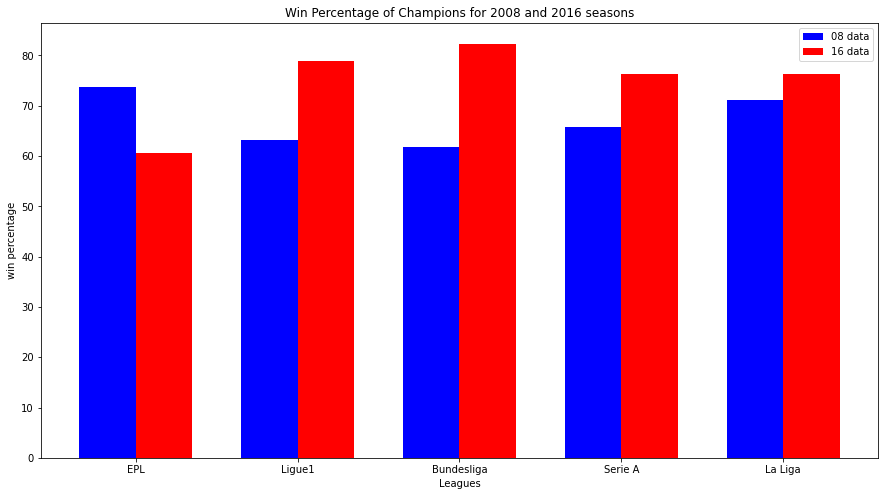

In [169]:
plt.figure(figsize=(15,8))
win_08_bars = plt.bar(ind, win_percent_08, width, color = 'b', label ='08 data' )
win_16_bars = plt.bar(ind + width, win_percent_16, width, color = 'r', label ='16 data' )
plt.legend()
plt.xlabel('Leagues')
plt.ylabel('win percentage')
labels = ['EPL', 'Ligue1', 'Bundesliga','Serie A', 'La Liga']
locations = ind + width/2
plt.xticks(locations, labels)
plt.title('Win Percentage of Champions for 2008 and 2016 seasons');

### Research Question 2 : Correlation between win total and average defence ratings

In [170]:
# creating another dataframe and removing the relegated teams in 2016 ie no wins 
team_data2 = team_data[team_data['win_16'] > 0]
team_data2.head()

,index,team_long_name,team_short_name,16_defence,league,pts_08,pts_16,win_08,win_16
3,20,Milan,ACM,54.666667,Italy Serie A,74,57,22,15
9,56,Angers SCO,ANG,46.333333,France Ligue 1,0,50,0,13
12,75,Arsenal,ARS,49.000000,England Premier League,72,71,20,20
13,81,Aston Villa,AVL,44.333333,England Premier League,62,17,17,3
14,87,Atalanta,ATA,49.333333,Italy Serie A,47,45,13,11


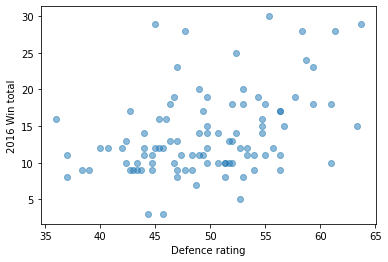

In [171]:
x_axis = team_data2['16_defence']
y_axis = team_data2['win_16']
plt.scatter(x_axis, y_axis, alpha = 0.5)
plt.xlabel("Defence rating")
plt.ylabel("2016 Win total");

### Research Question 3 : Which countries' league has the highest average team & player attributes for 2016? 

<a id='conclusions'></a>
## Conclusions

### Question 1 conclusion
A cursory scan of the bar chart plot indicates that the win percentage increased for all the leagues except the EPL when comparing the 2008 and 2016 seasons. But it appears to be that a minimum win percentage of 60% was needed to win the championship. 

In the process, I confirmed that those who won the most matches were the champions for the 08' and 16'seasons. Mathematically speaking though, it is possible to win fewer matches than another team and still win the league. 

### Question 2 conclusion
There seems to be some positive correlation between defence ratings and total wins. However, the correlation appears to be a gentle one. Since I haven't learned how to do regressions yet, I won't be definitive in plotting a straight line through- though this is something I intend to do in the future. 

### Question 3 conclusion 

### References:
Websites:

Creating an empty column 
https://stackoverflow.com/questions/16327055/how-to-add-an-empty-column-to-a-dataframe

Compare two columns:
https://stackoverflow.com/questions/38925082/how-to-compare-two-columns-in-pandas-to-make-a-third-column

Max of groupby and count:
https://stackoverflow.com/questions/51053911/get-max-of-count-function-on-pandas-groupby-objects

Get rows of max values:
https://stackoverflow.com/questions/50815893/get-rows-with-largest-value-in-grouping

How to determine a variable type:
https://stackoverflow.com/questions/402504/how-to-determine-a-python-variables-type